In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
athletes = pd.read_csv('athlete_events.csv')
athletes.shape

(271116, 15)

In [213]:
noc = pd.read_csv('noc_regions.csv')
noc.shape

(230, 3)

In [214]:
noc.drop(['notes'], axis=1, inplace=True)

In [215]:
athleteNOC = athletes.merge(noc, left_on='NOC', right_on='NOC', how='left')

In [216]:
athleteNOC.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [217]:
print(athleteNOC.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64


In [222]:
athleteNOC = athleteNOC[athleteNOC['Age'].notna()]
athleteNOC = athleteNOC[athleteNOC['region'].notna()]
athleteNOC = athleteNOC[athleteNOC['Weight'].notna()]
athleteNOC = athleteNOC[athleteNOC['Height'].notna()]
athleteNOC['Medal'].fillna('DNW', inplace = True)

In [223]:
print(athleteNOC.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64


In [224]:
athletes.shape

(271116, 15)

In [225]:
#if athlete won medals then exceed 1, if not tehn exceeds 0
athleteNOC['Medal_Won'] = np.where(athleteNOC.loc[:,'Medal'] == 'DNW', 0, 1)

    

In [288]:
events = pd.pivot_table(athleteNOC,  index = ['region', 'Year'], columns = 'Medal', values = 'Medal_Won', aggfunc = 'sum',fill_value = 0).drop('DNW', axis = 1).reset_index()

#events = events.loc[events['Gold'] > 0, :]

region = events['region'].unique()

year = events['Year'].unique()



In [289]:
year

array([1960, 1964, 1968, 1972, 1980, 2004, 2008, 2012, 2016, 1992, 1996,
       2000, 2006, 2010, 2014, 1984, 1988, 1994, 1976, 1998, 2002, 1924,
       1928, 1932, 1936, 1948, 1952, 1956, 1900, 1906, 1908, 1912, 1920,
       1904, 1896])

In [290]:
events.head()

Medal,region,Year,Bronze,Gold,Silver
0,Afghanistan,1960,0,0,0
1,Afghanistan,1964,0,0,0
2,Afghanistan,1968,0,0,0
3,Afghanistan,1972,0,0,0
4,Afghanistan,1980,0,0,0


In [291]:
region

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam'

In [292]:
events.shape

(3044, 5)

In [248]:
Gold_total = events.groupby(['Year','region'])['Gold'].agg('sum').reset_index()

Gold_total_pivot = pd.pivot_table(Gold_total,
                     index = 'region',
                     columns = 'Year',
                     values = 'Gold',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

Gold_total_pivot.loc[:,'All']

region
USA        2115
Russia     1465
Germany    1102
Canada      362
Name: All, dtype: int64

In [293]:
medal_total = athleteNOC.groupby(['Year','region'])['Medal_Won'].agg('sum').reset_index()

medal_total_pivot = pd.pivot_table(medal_total,
                     index = 'region',
                     columns = 'Year',
                     values = 'Medal_Won',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

medal_total_pivot.loc[:,'All']

region
USA          4383
Russia       3610
Germany      3189
Australia    1210
Name: All, dtype: int64

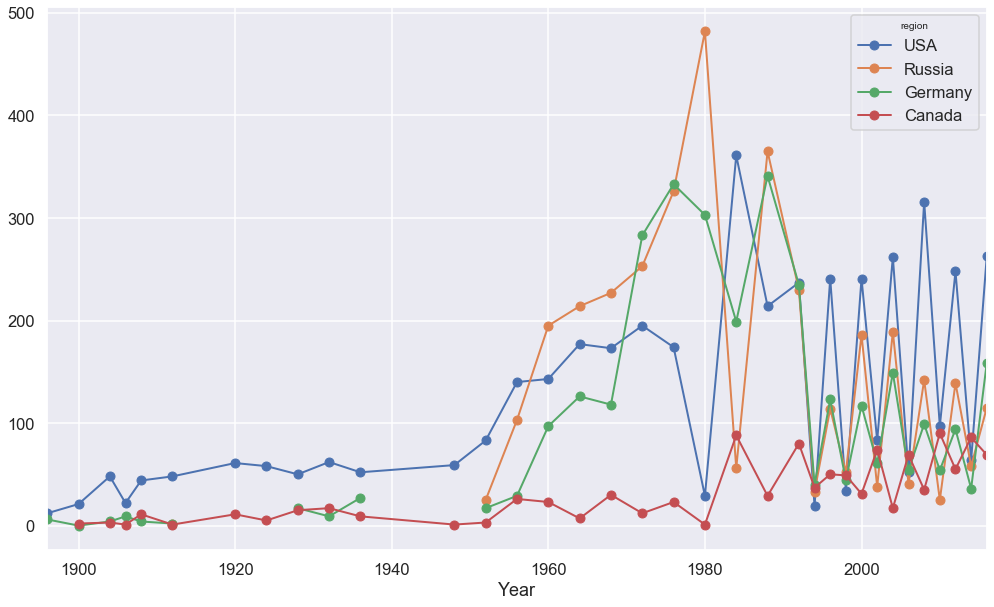

In [295]:
top_countries_won_Gold = ['USA', 'Russia', 'Germany', 'Canada']

year_team_medals = pd.pivot_table(medal_total, index = 'Year',columns = 'region',values = 'Medal_Won',aggfunc = 'sum')[top_countries_won_Gold]

# plotting the medal tallies
year_team_medals.plot(linestyle = '-',  marker = 'o',figsize = (15,10), linewidth = 2)
